# Evaluating our Models

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
from utils import read_embeddings, generate_ngram_training_samples, data_generator

In [47]:
N_GRAM = 5
BATCH_SIZE = 1000
SENTENCE_BEGIN = '<s>'
SENTENCE_END = '</s>'
NEW_LINE = 'newlinebreak'
STANZAS_FILE = "../data/processed/stanzas.txt"

FEEDFORWARD_FILE = "../models/feed_forward_model.h5"

RNN_MODEL_2_UNITS_FILE = "../models/rnn_model_2_units.h5"
RNN_MODEL_4_UNITS_FILE = "../models/rnn_model_4_units.h5"
RNN_MODEL_8_UNITS_FILE = "../models/rnn_model_8_units.h5"
RNN_MODEL_16_UNITS_FILE = "../models/rnn_model_16_units.h5"
RNN_MODEL_32_UNITS_FILE = "../models/rnn_model_32_units.h5"
RNN_MODEL_64_UNITS_FILE = "../models/rnn_model_64_units.h5"

LSTM_FILE = "../models/lstm_model.h5"

ATTENTION_LSTM_FILE = "../models/attention_lstm_model.h5"

## Make Tokenizer and get Embeddings

In [26]:
stanzas_as_words = []
with open(STANZAS_FILE, 'r', encoding='utf-8') as txtfile:
    for line in txtfile:
        # Split each line into a list using '\t' as the separator
        line_data = line.strip().split('\t')
        stanzas_as_words.append(line_data)

tokenizer = Tokenizer(char_level=False)
tokenizer.fit_on_texts(stanzas_as_words)
# Convert stanzas into numerical indexes (list of lists of string -> list of lists of int)
stanzas = tokenizer.texts_to_sequences(stanzas_as_words)

In [27]:
index_to_embeddings = read_embeddings("../reference-materials/lyrics_embeddings.txt", tokenizer=tokenizer)

### Get Ngrams and Split in train and test

In [28]:
X, y = generate_ngram_training_samples(stanzas, N_GRAM)
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

# Load in models

In [64]:
feedforward_model = keras.models.load_model(FEEDFORWARD_FILE)
rnn_model_2_units = keras.models.load_model(RNN_MODEL_2_UNITS_FILE)
rnn_model_4_units = keras.models.load_model(RNN_MODEL_4_UNITS_FILE)
rnn_model_8_units = keras.models.load_model(RNN_MODEL_8_UNITS_FILE)
rnn_model_16_units = keras.models.load_model(RNN_MODEL_16_UNITS_FILE)
rnn_model_32_units = keras.models.load_model(RNN_MODEL_32_UNITS_FILE)
rnn_model_64_units = keras.models.load_model(RNN_MODEL_64_UNITS_FILE)

lstm_model = keras.models.load_model(LSTM_FILE)
attention_lstm_model = keras.models.load_model(ATTENTION_LSTM_FILE)

## Evaluation Functions

In [33]:
def test_model(model, X_test, y_test, index_to_embeddings):
  data_generator_test = data_generator(X_test, y_test, index_to_embeddings, batch_size=BATCH_SIZE, sequence_length=N_GRAM, epochs=1)
  loss, accuracy = model.evaluate(data_generator_test, steps=len(X_test) // BATCH_SIZE)
  perplexity = np.power(2, loss)
  return loss, accuracy, perplexity


In [40]:
rnn_model_2_units_loss, rnn_model_2_units_accuracy, rnn_model_2_units_perplexity = test_model(rnn_model_2_units, X_test, y_test, index_to_embeddings)
print("RNN model with 2 units: loss = {}, accuracy = {}, perplexity = {}".format(rnn_model_2_units_loss, rnn_model_2_units_accuracy, rnn_model_2_units_perplexity))

4497/4497 [==============================] - 923s 205ms/step - loss: 7.7357 - accuracy: 0.1166
RNN model with 2 units: loss = 7.735691547393799, accuracy = 0.11664687842130661, perplexity = 213.14502141686475


In [34]:
rnn_model_4_units_loss, rnn_model_4_units_accuracy, rnn_model_4_units_perplexity = test_model(rnn_model_4_units, X_test, y_test, index_to_embeddings)
print("RNN model with 4 units: loss = {}, accuracy = {}, perplexity = {}".format(rnn_model_4_units_loss, rnn_model_4_units_accuracy, rnn_model_4_units_perplexity))

4497/4497 [==============================] - 877s 194ms/step - loss: 9.7768 - accuracy: 0.1066
RNN model with 4 units: loss = 9.776773452758789, accuracy = 0.10659462213516235, perplexity = 877.2069625476673


In [35]:
rnn_model_8_units_loss, rnn_model_8_units_accuracy, rnn_model_8_units_perplexity = test_model(rnn_model_8_units, X_test, y_test, index_to_embeddings)
print("RNN model with 8 units: loss = {}, accuracy = {}, perplexity = {}".format(rnn_model_8_units_loss, rnn_model_8_units_accuracy, rnn_model_8_units_perplexity))

4497/4497 [==============================] - 822s 183ms/step - loss: 15.1290 - accuracy: 0.0786
RNN model with 8 units: loss = 15.128952026367188, accuracy = 0.07862485945224762, perplexity = 35831.77834450515


In [36]:
rnn_model_16_units_loss, rnn_model_16_units_accuracy, rnn_model_16_units_perplexity = test_model(rnn_model_16_units, X_test, y_test, index_to_embeddings)
print("RNN model with 16 units: loss = {}, accuracy = {}, perplexity = {}".format(rnn_model_16_units_loss, rnn_model_16_units_accuracy, rnn_model_16_units_perplexity))

4497/4497 [==============================] - 1397s 311ms/step - loss: 18.8131 - accuracy: 0.0649
RNN model with 16 units: loss = 18.813146591186523, accuracy = 0.06487391889095306, perplexity = 460597.3519137311


In [41]:
# rnn_model_32_units_loss, rnn_model_32_units_accuracy, rnn_model_32_units_perplexity = test_model(rnn_model_32_units, X_test, y_test, index_to_embeddings)
# print("RNN model with 32 units: loss = {}, accuracy = {}, perplexity = {}".format(rnn_model_32_units_loss, rnn_model_32_units_accuracy, rnn_model_32_units_perplexity))

4497/4497 [==============================] - 859s 191ms/step - loss: 19.0547 - accuracy: 0.0683
RNN model with 32 units: loss = 19.054731369018555, accuracy = 0.0683453381061554, perplexity = 544559.9546057662


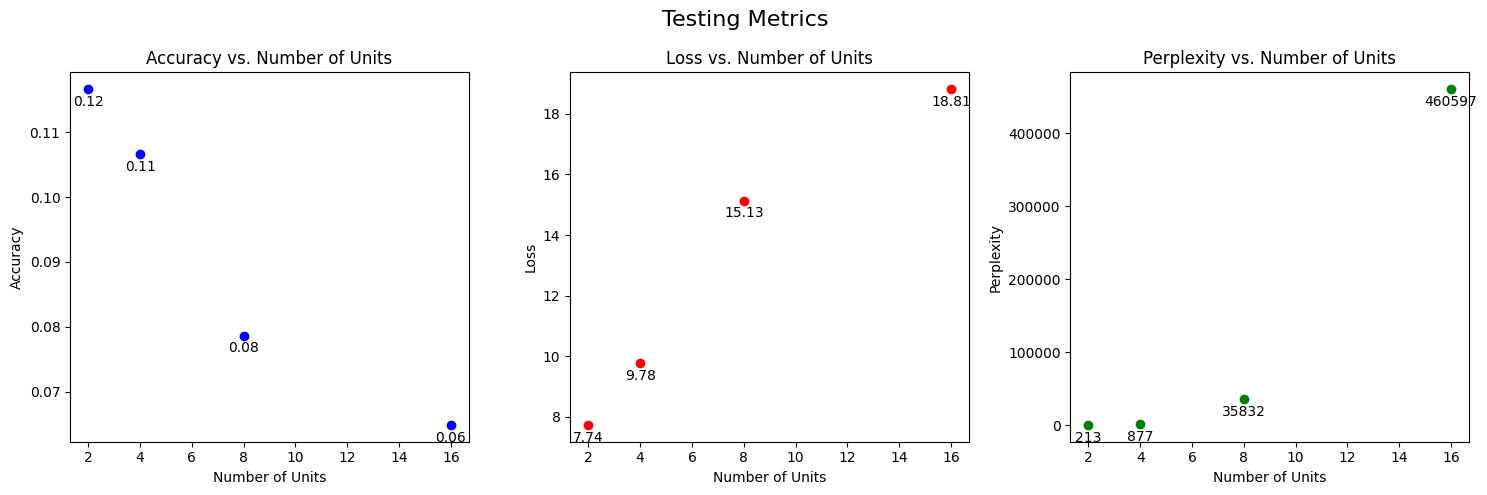

In [63]:
accuracies = [rnn_model_2_units_accuracy, rnn_model_4_units_accuracy, rnn_model_8_units_accuracy, rnn_model_16_units_accuracy]
losses = [rnn_model_2_units_loss, rnn_model_4_units_loss, rnn_model_8_units_loss, rnn_model_16_units_loss]
perplexities = [rnn_model_2_units_perplexity, rnn_model_4_units_perplexity, rnn_model_8_units_perplexity, rnn_model_16_units_perplexity,]
units = [2, 4, 8, 16]

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Accuracy vs. Number of Units
axs[0].scatter(units, accuracies, color='blue')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Number of Units')
axs[0].set_title('Accuracy vs. Number of Units')

# Annotate each point with its accuracy value
for i, txt in enumerate(accuracies):
    axs[0].annotate(f'{accuracies[i]:.2f}', (units[i], accuracies[i]), textcoords="offset points", xytext=(0,-12), ha='center')

# Plot Loss vs. Number of Units
axs[1].scatter(units, losses, color='red')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Number of Units')
axs[1].set_title('Loss vs. Number of Units')

# Annotate each point with its accuracy value
for i, txt in enumerate(losses):
    axs[1].annotate(f'{losses[i]:.2f}', (units[i], losses[i]), textcoords="offset points", xytext=(0,-12), ha='center')

# Plot Perplexity vs. Number of Units
axs[2].scatter(units, perplexities, color='green')
axs[2].set_ylabel('Perplexity')
axs[2].set_xlabel('Number of Units')
axs[2].set_title('Perplexity vs. Number of Units')


# Annotate each point with its accuracy value
for i, txt in enumerate(perplexities):
    axs[2].annotate(f'{perplexities[i]:.0f}', (units[i], perplexities[i]), textcoords="offset points", xytext=(0,-12), ha='center')

# Set a general title for the entire plot
fig.suptitle('Testing Metrics', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

In [49]:
feed_forward_model_loss, feed_forward_model_accuracy, feed_forward_model_perplexity = test_model(feedforward_model, X_test, y_test, index_to_embeddings)
print("Feed forward model: loss = {}, accuracy = {}, perplexity = {}".format(feed_forward_model_loss, feed_forward_model_accuracy, feed_forward_model_perplexity))

4497/4497 [==============================] - 919s 204ms/step - loss: 8.7095 - accuracy: 0.1058
Feed forward model: loss = 8.709470748901367, accuracy = 0.10578252375125885, perplexity = 418.6122583607503


In [65]:
lstm_model_loss, lstm_model_accuracy, lstm_model_perplexity = test_model(lstm_model, X_test, y_test, index_to_embeddings)
print("LSTM model: loss = {}, accuracy = {}, perplexity = {}".format(lstm_model_loss, lstm_model_accuracy, lstm_model_perplexity))

4497/4497 [==============================] - 903s 201ms/step - loss: 8.6294 - accuracy: 0.1164
LSTM model: loss = 8.62939167022705, accuracy = 0.11641694605350494, perplexity = 396.00962090157634


In [44]:
lstm_model_attention_loss, lstm_model_attention_accuracy, lstm_model_attention_perplexity = test_model(attention_lstm_model, X_test, y_test, index_to_embeddings)
print("LSTM model with attention: loss = {}, accuracy = {}, perplexity = {}".format(lstm_model_attention_loss, lstm_model_attention_accuracy, lstm_model_attention_perplexity))

4497/4497 [==============================] - 823s 183ms/step - loss: 11.2252 - accuracy: 0.0735
LSTM model with attention: loss = 11.225196838378906, accuracy = 0.07350300252437592, perplexity = 2393.98241286639
